# HW2 - Q2

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [2]:
data2 = pd.read_csv("data2.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      2000 non-null   float64
 1   f1      2000 non-null   float64
 2   f2      2000 non-null   float64
 3   f3      2000 non-null   float64
 4   f4      2000 non-null   float64
 5   f5      2000 non-null   float64
 6   f6      2000 non-null   float64
 7   f7      2000 non-null   float64
 8   f8      2000 non-null   float64
 9   f9      2000 non-null   float64
 10  f10     2000 non-null   float64
 11  f11     2000 non-null   float64
 12  f12     2000 non-null   float64
 13  f13     2000 non-null   float64
 14  f14     2000 non-null   float64
 15  f15     2000 non-null   float64
 16  f16     2000 non-null   float64
 17  f17     2000 non-null   float64
 18  f18     2000 non-null   float64
 19  f19     2000 non-null   float64
 20  f20     2000 non-null   float64
 21  f21     2000 non-null   float64
 22  

In [3]:
data2.isna().sum()

f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
f28      0
f29      0
f30      0
f31      0
f32      0
f33      0
f34      0
f35      0
f36      0
f37      0
f38      0
f39      0
f40      0
f41      0
f42      0
f43      0
f44      0
f45      0
f46      0
f47      0
f48      0
f49      0
label    0
dtype: int64

In [5]:
X = data2.drop(["label"],axis=1)
y = data2["label"]

In [6]:
acc10 = []
acc20 = []
n_splits = 5
kf = KFold(n_splits=n_splits)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]

    #Normalization
    X_train_mean = X_train.mean()
    X_train_std = X_train.std()
    X_train = (X_train - X_train_mean) / X_train_std
    X_test = (X_test - X_train_mean) / X_train_std

    pca1 = PCA(n_components=20)
    pca1.fit(X_train)

    pca2 = PCA(n_components=10)
    pca2.fit(X_train)

    pca1_train = pca1.transform(X_train)
    pca1_test = pca1.transform(X_test)
    
    pca2_train = pca2.transform(X_train)
    pca2_test = pca2.transform(X_test)  

    clf = SVC()
    clf.fit(pca1_train,y_train)
    y_pred_svm1 = clf.predict(pca1_test)
    acc1 = accuracy_score(y_pred_svm1,y_test)
    acc10.append(acc1)

    clf = SVC()
    clf.fit(pca2_train,y_train)
    y_pred_svm2 = clf.predict(pca2_test)
    acc2 = accuracy_score(y_pred_svm2,y_test)
    acc20.append(acc2)

print(f"SVM with pca n = 20 accuracy {n_splits}-fold: {np.mean(acc10)}")
print(f"SVM with pca n = 10 accuracy {n_splits}-fold: {np.mean(acc20)}")

        


SVM with pca n = 20 accuracy 5-fold: 1.0
SVM with pca n = 10 accuracy 5-fold: 1.0


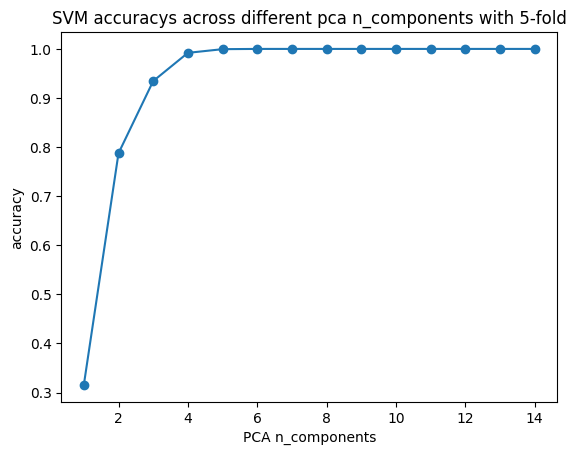

In [8]:
accs = []
n_splits = 5
kf = KFold(n_splits=n_splits)
for n_components in range(1,15):
    acc = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        
        X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]

        #Normalization
        X_train_mean = X_train.mean()
        X_train_std = X_train.std()
        X_train = (X_train - X_train_mean) / X_train_std
        X_test = (X_test - X_train_mean) / X_train_std

        pca1 = PCA(n_components=n_components)
        pca1.fit(X_train)

        pca1_train = pca1.transform(X_train)
        pca1_test = pca1.transform(X_test)

        clf = SVC()
        clf.fit(pca1_train,y_train)
        y_pred_svm1 = clf.predict(pca1_test)
        acc.append(accuracy_score(y_pred_svm1,y_test))
    accs.append(np.mean(acc))

plt.figure()
plt.plot(range(1,15),accs,'o-')
plt.title("SVM accuracys across different pca n_components with 5-fold")
plt.xlabel("PCA n_components")
plt.ylabel("accuracy")
plt.show()
